# Example 1: Query a table with SQL and magic commands

In [1]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project code-for-planet
SELECT * FROM `code-for-planet.emission_db.emissions_db_final` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,global_id,global_fire_event_id,original_id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,...,event_duration_days,event_start_date,event_end_date,event_spatial_extent_km,event_centroid_lon,event_centroid_lat,event_total_ECO2,event_total_area_burned,event_spread_rate_km_per_day,fire_event_quality_flag
0,2014_104727856,2014_69955,104727856,2014,203,-111.5519,34.8367,53110,3,1220,...,5,2014-07-18,2014-07-22,5.532992,-111.537938,34.854476,6.568207e+05,6562500.0,1.106598,normal
1,2013_273319,2013_23968,273319,2013,71,-81.4977,32.0847,38634,3,1600,...,4,2013-03-09,2013-03-12,5.136464,-81.506233,32.070793,3.584639e+05,3000000.0,1.284116,normal
2,2013_280162,2013_17384,280162,2013,67,-80.1101,33.4279,46481,3,1160,...,1,2013-03-08,2013-03-08,0.000000,-80.110100,33.427900,6.035327e+03,62500.0,0.000000,normal
3,2013_280265,2013_4296,280265,2013,78,-95.3893,34.5306,46341,3,1500,...,1,2013-03-19,2013-03-19,3.277650,-95.389325,34.515415,1.939495e+05,1562500.0,0.000000,normal
4,2013_281073,2013_4267,281073,2013,76,-95.9273,34.5970,46797,3,1500,...,1,2013-03-17,2013-03-17,0.745007,-95.927300,34.600375,1.517917e+04,187500.0,0.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254529,2008_205499,2008_37084,205499,2008,177,-122.9943,39.3600,86215,3,1370,...,7,2008-06-22,2008-06-28,4.430095,-122.977940,39.370434,9.658655e+05,6125000.0,0.632871,normal
7254530,2008_211303,2008_36857,211303,2008,228,-121.4291,39.8887,87151,3,1370,...,1,2008-08-15,2008-08-15,37.119975,-121.444130,39.851993,2.587413e+07,176187500.0,0.000000,normal
7254531,2008_211380,2008_36857,211380,2008,228,-121.4136,39.8966,87151,3,1370,...,1,2008-08-15,2008-08-15,37.119975,-121.444130,39.851993,2.587413e+07,176187500.0,0.000000,normal
7254532,2008_211867,2008_36857,211867,2008,228,-121.3598,39.9424,87152,3,1370,...,1,2008-08-15,2008-08-15,37.119975,-121.444130,39.851993,2.587413e+07,176187500.0,0.000000,normal


# Example 2: Query a table with BigQuery DataFrames

In [4]:
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens in BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "US" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "code-for-planet" #this variable is set based on the dataset you chose to query

In [5]:
df = bf.read_gbq("code-for-planet.emission_db.emissions_db_final") #this variable is set based on the dataset you chose to query

In [6]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,global_id,global_fire_event_id,original_id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,...,event_duration_days,event_start_date,event_end_date,event_spatial_extent_km,event_centroid_lon,event_centroid_lat,event_total_ECO2,event_total_area_burned,event_spread_rate_km_per_day,fire_event_quality_flag
0,2007_29268,2007_109900,29268,2007,284,-86.8322,30.782,29366,3,1140,...,1,2007-10-11,2007-10-11,1.293391,-86.827167,30.7846,100535.603297,562500.0,0.0,normal
1,2015_134673813,2015_47410,134673813,2015,84,-88.9176,30.956,29346,3,1160,...,3,2015-03-25,2015-03-27,23.486709,-88.919124,30.940228,1219972.615063,11562500.0,7.828903,normal
2,2005_1384,2005_32273,1384,2005,97,-80.4561,25.7658,7768,95,0,...,2,2005-04-06,2005-04-07,2.41166,-80.454535,25.772519,2025.353833,2312500.0,1.20583,normal
3,2012_563347,2012_1015,563347,2012,254,-119.1019,47.9541,124994,2,2,...,3,2012-09-09,2012-09-11,21.151106,-119.047933,47.972552,375628.375139,68000000.0,7.050369,normal
4,2015_38369737,2015_986,38369737,2015,217,-115.3609,43.1314,97812,2,2,...,1,2015-08-05,2015-08-05,4.78635,-115.379782,43.132991,88461.760643,5625000.0,0.0,normal
5,2011_205000,2011_240489,205000,2011,130,-109.1576,31.7936,36069,3,1920,...,1,2011-05-10,2011-05-10,0.0,-109.1576,31.7936,4845.287933,62500.0,0.0,isolated_fire
6,2005_277614,2005_68849,277614,2005,244,-113.7265,46.1333,112122,3,1280,...,15,2005-08-26,2005-09-09,15.924108,-113.747116,46.148106,4538111.007794,34562500.0,1.061607,normal
7,2011_62454,2011_72462,62454,2011,105,-101.3735,30.4444,26000,2,2,...,4,2011-04-15,2011-04-18,22.587954,-101.404325,30.410002,3265636.516134,87375000.0,5.646988,normal
8,2007_124191,2007_77123,124191,2007,295,-118.673,34.4521,57194,2,2,...,12,2007-10-18,2007-10-29,32.314438,-118.756607,34.494626,10955230.860962,195812500.0,2.69287,normal
9,2008_231898,2008_37055,231898,2008,182,-122.7645,40.5211,91752,3,1200,...,21,2008-06-22,2008-07-12,25.667167,-122.662677,40.54689,16403963.833333,138937500.0,1.222246,normal


# Example 3: Query a table with remote Spark session

In [7]:
from google.cloud.dataproc_spark_connect import DataprocSparkSession

## Create a Spark session with default configuration:
spark = DataprocSparkSession.builder.getOrCreate()

█████████████████████████████████████████████████████▎                          

In [8]:
from google.cloud.dataproc_spark_connect import DataprocSparkSession
from google.cloud.dataproc_v1 import Session

project = "code-for-planet" # @param {type:"string"}
location = "" # @param {type:"string"}
sessionTemplate = "" # @param {type:"string"}

## Create a Spark session with custom configurations
## Before creating a session using the following code, create an interactive
## session template, and update the session_template field below.
## Learn more here: https://cloud.google.com/sdk/gcloud/reference/beta/dataproc/session-templates
session = Session()
session.session_template = f"projects/{project}/locations/{location}/sessionTemplates/{sessionTemplate}"
spark = (
    DataprocSparkSession.builder
      .appName("CustomSparkSession")
      .dataprocSessionConfig(session)
      .getOrCreate()
)

Using existing Dataproc Session (configuration changes may not be applied): https://console.cloud.google.com/dataproc/interactive/us-east4/sc-20250807-011007-e0x8uk?project=code-for-planet


In [9]:
# Load data from BigQuery.
table = spark.read.format('bigquery') \
  .option('table', 'code-for-planet.emission_db.emissions_db_final') \
  .load()
table.createOrReplaceTempView('table')

# Explore the data and schema.
table_data = spark.sql("SELECT * FROM table")
table_data.show()
table_data.printSchema()

+---------+--------------------+-----------+----+---+---------+--------+-------+---------+--------+-----------+------------+-------------+----------+---------+--------+--------+--------+---------+-------------------+-----------+--------------+----+---------+----------+--------+------------------+-----------------+------------------+--------+----------+-----------------+--------------------+-----------------+------------------+--------+------------------+------------------+-----------------+-----------+----------------------+-----------------+-----------------+-----------------------------+---------------------+-----------------+-------------------+----------------+--------------+-----------------------+------------------+------------------+-----------------+-----------------------+----------------------------+-----------------------+
|global_id|global_fire_event_id|original_id|year|doy|longitude|latitude|grid10k|covertype|fuelcode|area_burned|prefire_fuel|consumed_fuel|      ECO2|     

In [10]:
# Select only numeric features (you can expand this list as needed)
numeric_features = df.select_dtypes(include=['float64', 'int64']).copy()

# Drop rows with missing target
numeric_features = numeric_features.dropna(subset=['event_duration_days'])

# Calculate correlation with the target
correlations = numeric_features.corr()['event_duration_days'].sort_values(ascending=False)

# Display top 15
print(correlations.head(30))

[None]
event_duration_days                   1.0
days_from_event_start            0.702478
event_total_ECO2                 0.476117
event_spatial_extent_km          0.393865
event_size_points                0.301084
ECH4                             0.274183
EPM2_5                           0.263165
event_total_area_burned          0.263152
ECO                              0.259469
cwd_frac                           0.2516
duff_frac                         0.24452
distance_to_event_centroid_km    0.240092
consumed_fuel                    0.221347
ECO2                             0.213271
prefire_fuel                     0.188435
fuelcode                         0.161233
bi_value                         0.080912
srad_value                       0.080268
doy                              0.064498
BSEV                             0.050149
grid10k                          0.030792
pet_value                        0.028773
th_value                         0.027856
tmmn_value                 

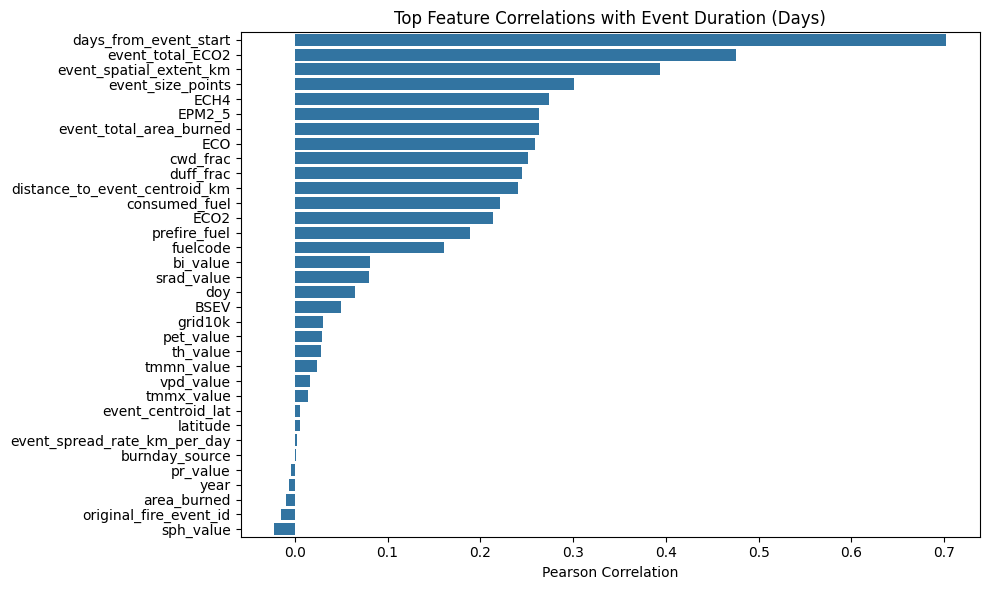

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top correlations excluding the target itself
top_corr = correlations[1:35]  # skip self-correlation

# Safe list conversion
x_vals = list(top_corr.values)
y_vals = list(top_corr.index)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=x_vals, y=y_vals)
plt.title("Top Feature Correlations with Event Duration (Days)")
plt.xlabel("Pearson Correlation")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = numeric_features.drop(columns=['event_duration_days'])
y = numeric_features['event_duration_days']

# Fill NA with 0 or use better imputation
X = X.fillna(0)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get importance
importances = rf.feature_importances_
feature_names = X.columns

# Plot
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [1]:
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [2]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()


NameError: name 'X_scaled' is not defined